In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”

Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger

Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”


In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 15
dataset <- har_examples[[15]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,1.0000000,FALSE
2,0.9939124,FALSE
3,0.9275826,FALSE
4,0.8066889,FALSE
5,0.6403023,FALSE
6,0.4403224,FALSE


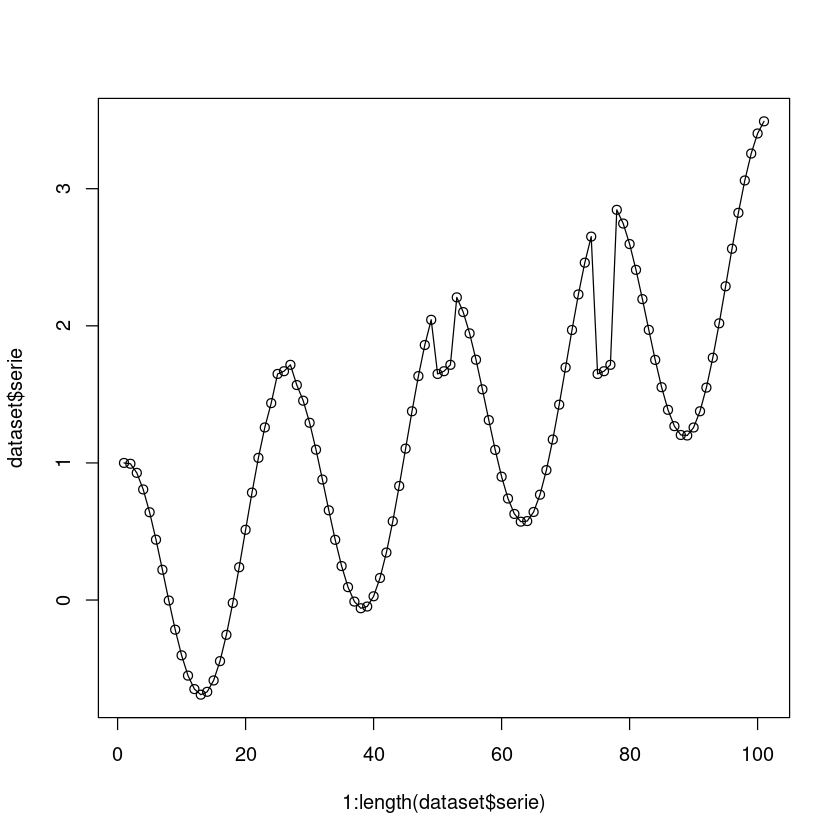

In [4]:
#ploting serie #15

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing garch method 
  model <- har_motif_sax(25, 3, 3)

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event  type seq seqlen
1  25  TRUE motif GGH      3
2  50  TRUE motif GGH      3
3  75  TRUE motif GGH      3


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      3     0    
FALSE     0     98   


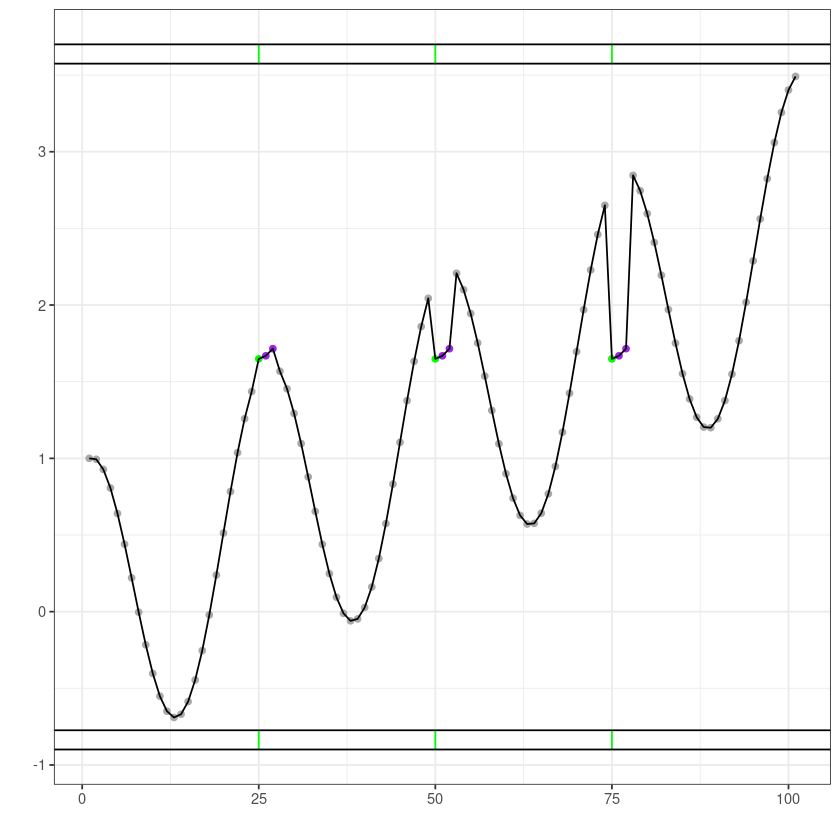

In [10]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)